**Exercise 2: Linear Regression with Bivariate Errors**

(a) Calculate the weighted average of the ratios and its standard deviation
To calculate the weighted average of the ratios and its standard deviation, we need to:

1. Read the data from the file.
2. Calculate the weights as the inverse of the variance.
3. Compute the weighted average and its standard deviation.

In [37]:
#Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import bces.bces as BCES

In [16]:
# Load the data from the file
data = np.loadtxt('/content/pressureRatio.dat',dtype=str)

# Extract the relevant columns
ratios = data[:, 10]
r_e_plus = data[:, 11]
r_e_minus = data[:, 12]
# Convert the data to float
ratios = np.array(ratios[1:], dtype=float)
r_e_plus = np.array(r_e_plus[1:], dtype=float)
r_e_minus = np.array(r_e_minus[1:], dtype=float)
# Calculate the average of the asymmetric errors
errors = (r_e_plus + r_e_minus) / 2

# Calculate the weights as the inverse of the variance
weights = 1 / errors**2

# Calculate the weighted average
weighted_average = np.sum(weights * ratios) / np.sum(weights)

# Calculate the standard deviation of the weighted average
weighted_std = np.sqrt(1 / np.sum(weights))

print(f"Weighted average of the ratios: {weighted_average:.4f}")
print(f"Standard deviation of the weighted average: {weighted_std:.4f}")
print(f"So the new weighted average is: {weighted_average:.4f}±{weighted_std:.4f}")

Weighted average of the ratios: 0.8956
Standard deviation of the weighted average: 0.0172
So the weighted average is: 0.8956±0.0172


(b) Calculate the linear average of the ratios and explain why it is larger than the weighted average
To calculate the linear average of the ratios:

In [17]:
# Calculate the linear average of the ratios
linear_average = np.mean(ratios)

print(f"Linear average of the ratios: {linear_average:.4f}")

Linear average of the ratios: 1.0056


The linear average is typically larger than the weighted average because the weighted average gives more importance to measurements with smaller errors, which might be lower in value.

(c) Show that the addition of ±0.1 to the statistical error results in a weighted average of 0.95±0.04.
To show this, we need to add ±0.1 to the errors and recalculate the weighted average:

In [18]:
# Add ±0.1 to the errors
additional_error = 0.1
new_errors = errors + additional_error

# Calculate the new weights
new_weights = 1 / new_errors**2

# Calculate the new weighted average
new_weighted_average = np.sum(new_weights * ratios) / np.sum(new_weights)

# Calculate the new standard deviation of the weighted average
new_weighted_std = np.sqrt(1 / np.sum(new_weights))

print(f"New weighted average of the ratios: {new_weighted_average:.4f}")
print(f"New standard deviation of the weighted average: {new_weighted_std:.4f}")
print(f"So the new weighted average is: {new_weighted_average:.2f}±{new_weighted_std:.2f}")

New weighted average of the ratios: 0.9505
New standard deviation of the weighted average: 0.0408
So the new weighted average is: 0.95±0.04


(d) Compare with the standard weighted average and explain the reason for the difference.

The difference arises because adding an additional error reduces the weight of each measurement, leading to a different weighted average.

(e) Calculate the linear average, weighted average, and median of each quantity.

To calculate these statistics for each quantity:

In [19]:
# Extract other relevant columns
radius = data[:, 1]
E1 = data[:, 4]
E2 = data[:, 7]
# Convert the data to float
radius=np.array(radius[1:], dtype=float)
E1=np.array(E1[1:], dtype=float)
E2=np.array(E2[1:], dtype=float)
# Function to calculate weighted average
def weighted_avg(values, errors):
    weights = 1 / errors**2
    avg = np.sum(weights * values) / np.sum(weights)
    return avg

# Calculate averages and medians
quantities = {'radius': radius, 'E1': E1, 'E2': E2, 'ratio': ratios}
errors_dict = {'radius': (np.array(data[1:, 2], dtype=float) + np.array(
    data[1:, 3], dtype=float)) / 2, 'E1': (np.array(data[1:, 5], dtype=float
                                                    ) + np.array(data[1:, 6], dtype=float)
    ) / 2, 'E2': (np.array(data[1:, 8], dtype=float) + np.array(data[1:, 9], dtype=float)) / 2, 'ratio': errors}

for key, values in quantities.items():
    linear_avg = np.mean(values)
    weighted_avg_val = weighted_avg(values, errors_dict[key])
    median_val = np.median(values)
    print(f"{key.capitalize()} - Linear average: {linear_avg:.4f}, Weighted average: {weighted_avg_val:.4f}, Median: {median_val:.4f}")


Radius - Linear average: 239.9480, Weighted average: 181.9777, Median: 196.2000
E1 - Linear average: 10.5912, Weighted average: 2.9287, Median: 5.0400
E2 - Linear average: 11.4692, Weighted average: 1.7549, Median: 4.7500
Ratio - Linear average: 1.0056, Weighted average: 0.8956, Median: 1.0200


(f) Calculate the weighted logarithmic average of the ratio and its uncertainty, then convert back to linear scale.

To calculate the weighted logarithmic average:

In [75]:
# Calculate the logarithms of the ratios
log_ratios = np.log(ratios)
weights = 1/(errors/ratios)**2
# Calculate the weighted average of the logarithms
log_weighted_avg = np.sum(weights * log_ratios) / np.sum(weights)

# Calculate the standard deviation of the weighted logarithmic average
log_weighted_std = np.sqrt(1 / np.sum(weights))

# Convert back to linear scale
linear_weighted_avg = np.exp(log_weighted_avg)
linear_weighted_std = np.exp(log_weighted_avg) * log_weighted_std

print(f"Weighted logarithmic average of the ratios: {log_weighted_avg:.4f}")
print(f"Uncertainty of the weighted logarithmic average: {log_weighted_std:.4f}")
print(f"So the weighted logarithmic average is: {log_weighted_avg:.4f}±{log_weighted_std:.4f}")
print(f"Weighted linear average of the ratios: {linear_weighted_avg:.4f}")
print(f"Uncertainty of the weighted linear average: {linear_weighted_std:.4f}")
print(f"So the weighted linear average is: {linear_weighted_avg:.4f}±{linear_weighted_std:.4f}")

Weighted logarithmic average of the ratios: -0.0553
Uncertainty of the weighted logarithmic average: 0.0189
So the weighted logarithmic average is: -0.0553±0.0189
Weighted linear average of the ratios: 0.9462
Uncertainty of the weighted linear average: 0.0179
So the weighted linear average is: 0.9462±0.0179


(g) Linear regression with bivariate error for E1 and E2.

To perform linear regression with bivariate errors, we can use the BCES package:

BCES, 10000 trials... 
8.303056 s
a= 1.1176±0.0928
b= -0.3549±0.6163


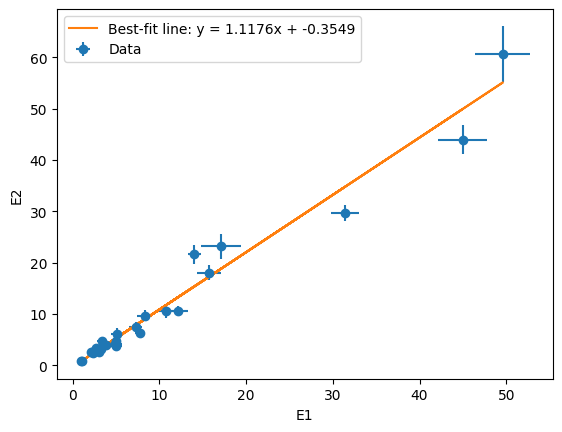

In [76]:
# Extract the relevant columns and calculate average errors
E1_errors = (np.array(data[1:, 5], dtype=float) + np.array(data[1:, 6], dtype=float))/2
E2_errors = (np.array(data[1:, 8], dtype=float) + np.array(data[1:, 9], dtype=float))/2
# Perform BCES regression
cov = np.zeros_like(E1)
a,b,aerr,berr,covab=BCES.bcesp(E1, E1_errors, E2, E2_errors,cov)
a=a[0]
b=b[0]
aerr=aerr[0]
berr=berr[0]
covab=covab[0]
print(f"a= {a:.4f}±{aerr:.4f}")
print(f"b= {b:.4f}±{berr:.4f}")
# Plot the data and the best-fit line
plt.errorbar(E1, E2, xerr=E1_errors, yerr=E2_errors, fmt='o', label='Data')
plt.plot(E1, b+ a * E1, label=f'Best-fit line: y = {a:.4f}x + {b:.4f}')
plt.xlabel('E1')
plt.ylabel('E2')
plt.legend()
plt.show()


(h) Linear regression with bivariate error for Radius and ratio

Similarly, for Radius and ratio:

BCES, 10000 trials... 
6.441364 s
a= -0.0005±0.0003
b= 1.1282±0.0827


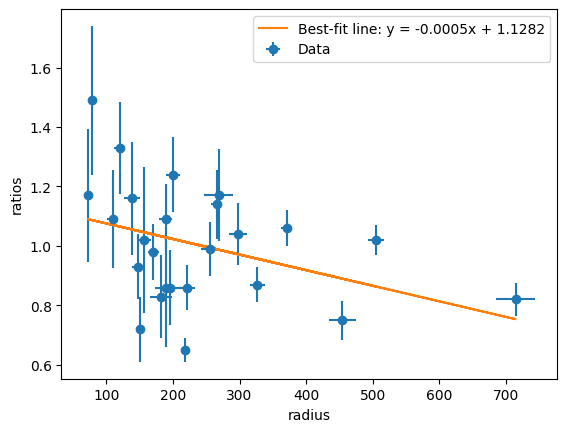

In [77]:
radius_errors = (np.array(data[1:, 2], dtype=float) + np.array(data[1:, 3], dtype=float))/2
ratios_errors = (np.array(data[1:, 11], dtype=float) + np.array(data[1:, 12], dtype=float))/2
# Perform BCES regression
cov = np.zeros_like(radius)
a,b,aerr,berr,covab=BCES.bcesp(radius, radius_errors, ratios, ratios_errors,cov)
a=a[0]
b=b[0]
aerr=aerr[0]
berr=berr[0]
covab=covab[0]
print(f"a= {a:.4f}±{aerr:.4f}")
print(f"b= {b:.4f}±{berr:.4f}")
# Plot the data and the best-fit line
plt.errorbar(radius, ratios, xerr=radius_errors, yerr=ratios_errors, fmt='o', label='Data')
plt.plot(radius, b + a * radius, label=f'Best-fit line: y = {a:.4f}x + {b:.4f}')
plt.xlabel('radius')
plt.ylabel('ratios')
plt.legend()
plt.show()